In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
complaints = pd.read_csv('complaints_dec_2014.csv')

In [3]:
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


## Number of Complaints by Product

In [4]:
products = complaints[['Product']]

In [5]:
products.head()

,Product
0,Debt collection
1,Debt collection
2,Debt collection
3,Debt collection
4,Debt collection


In [6]:
products.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

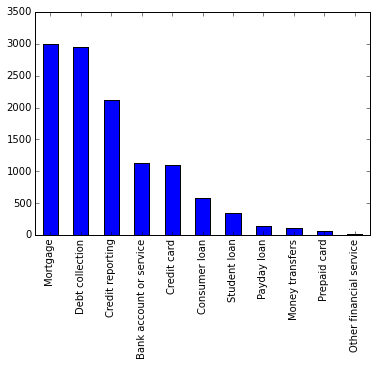

In [7]:
products.Product.value_counts().plot(kind='bar')
plt.show()

The a

## Number of Complaints by Company (top 10)

In [8]:
company = complaints[['Company']]

In [9]:
top_ten_companies = company.Company.value_counts()[:9]

In [10]:
top_ten_companies

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
dtype: int64

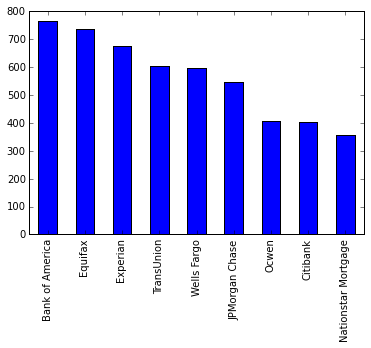

In [11]:
top_ten_companies.plot(kind='bar')
plt.show()

## Number of Complaints by Company Response

In [12]:
company_response = complaints['Company response']

In [13]:
company_response.value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

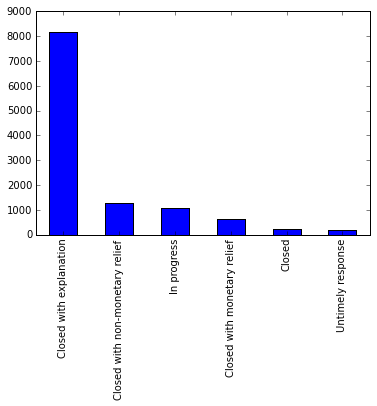

In [14]:
company_response.value_counts().plot(kind='bar')
plt.show()

## Number of Complaints by Day of the Week

In [15]:
date_complaints = complaints.copy()

In [16]:
date_index = date_complaints.pop('Date received')

In [17]:
date_index.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [18]:
date_complaints.index = pd.to_datetime(date_index, format='%m/%d/%Y')

In [19]:
date_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [20]:
daily_complaints = date_complaints.copy()

In [21]:
daily_complaints.index = daily_complaints.index.dayofweek

In [22]:
daily_complaints.index.value_counts()

1    2580
0    2544
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

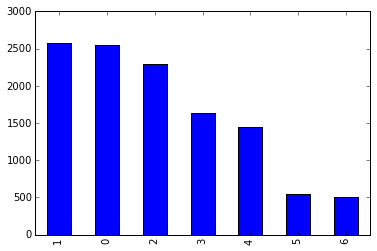

In [23]:
daily_complaints.index.value_counts().plot(kind='bar')
plt.show()

In [24]:
# daily_complaints.index.to_series().map(lambda d: d.weekday())

In [25]:
# daily_complaints['day_of_week'] = daily_complaints.index.to_series().map(lambda d: d.weekday()).head()

# Other Insights

## By State

In [26]:
state = complaints['State']

In [27]:
top_states = state.value_counts()[:25]

In [28]:
top_states

CA    1591
TX    1099
FL    1093
NY     733
GA     512
NJ     465
IL     427
PA     418
VA     373
OH     348
MD     342
NC     287
MI     287
WA     231
AZ     213
MA     200
TN     192
CO     180
NV     159
AL     147
WI     143
MN     135
IN     132
SC     130
LA     127
dtype: int64

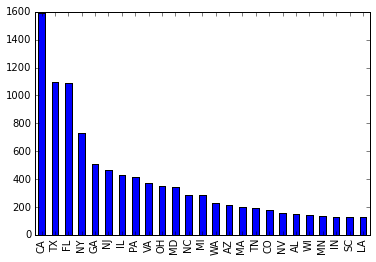

In [29]:
top_states.plot(kind='bar')
plt.show()

## Submitted

In [30]:
submitted = complaints['Submitted via']

In [31]:
submitted_via = submitted.value_counts()

In [32]:
submitted_via

Web            8349
Referral       1603
Postal mail     723
Phone           710
Fax             154
Email             4
dtype: int64

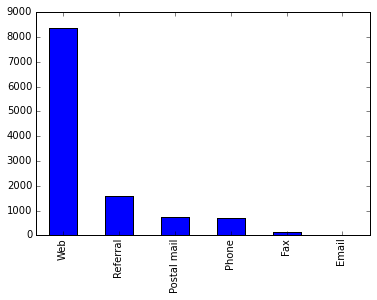

In [33]:
submitted_via.plot(kind='bar')
plt.show()

## Timely Response 

In [34]:
response = complaints['Timely response?']

In [35]:
timely = response.value_counts()

In [36]:
timely 

Yes    11190
No       353
dtype: int64

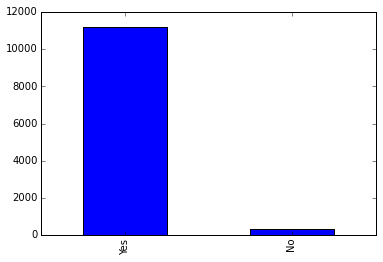

In [37]:
timely.plot(kind='bar')
plt.show()